<img src="header.png" align="left"/>

# Exercise: Reinforcement Learning Moon Lander (10 points)


The goal of this exercise is to work with reinforcement learning models and get a basic understanding of the topic. We will first develop controlers for the simple cart pole model and later for the lunar lander.
Neil Armstrong was the first to control a lunar lander in 1969. See a [video](https://youtu.be/xc1SzgGhMKc?t=520) about this masterpiece.
Luckily, we do not have to go to the moon, but can do our experiments in simulation based on the [Openai gym](https://gym.openai.com/) software.


**NOTE**: if openai gym does not install in anaconda, please install the following packages **in your conda environment** using the following commands:

```
conda install swig
pip install gym
pip install box2d-py
pip install pyglet
```

**NOTE**: it can happend that the rendering window does not show up or close properly. In this case please check your environment and look for a solution and post it in the forum.

**NOTE**

Document your results by simply adding a markdown cell or a python cell (as comment) and writing your statements into this cell. For some tasks the result cell is already available.


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ditomax/mlexercises/blob/master/06%20Exercise%20Reinforcement%20Learning.ipynb)


# Module imports

In [1]:
#
# Prepare colab
#
COLAB=False
try:
    %tensorflow_version 2.x
    print("running on google colab")
    COLAB=True
    !pip install gym
    !pip install box2d-py
    !sudo apt-get install -y xvfb ffmpeg x11-utils
    !pip install -q 'imageio==2.4.0'
    !pip install -q PILLOW
    !pip install -q 'pyglet==1.3.2'
    !pip install -q pyvirtualdisplay
    
except:
    print("not running on google colab")


#
# Turn off errors and warnings (does not work sometimes)
#
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=Warning)

#
# Import modules
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gym
import time

not running on google colab


In [2]:
if COLAB:
    import PIL.Image
    import pyvirtualdisplay
    # Set up a virtual display for rendering OpenAI gym environments.
    display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()

In [3]:
#
# Some print options for numpy
#
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

In [4]:
#
# Tensorflow
#
import tensorflow as tf

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR )


#
# Check version
#
print('starting notebook with tensorflow version {}'.format(tf.version.VERSION))

starting notebook with tensorflow version 2.4.1


# Control system with random controller

<div class="alert alert-block alert-info">

## Task

Run this basic cart pole example with a randome controller (env.action_space.sample()) (2 point) 

Find out how the example works and what the basic functions of gym are. 

Comment **each line** of the code with python comments. 

Find out what the *observation* and *action* values for the cart-pole mean and how the reward is generated.
</div>

In [5]:
#
# Result: comments in code
#
env = gym.make('CartPole-v0')
env.reset()

cumulated_reward = 0
restart_count = 0
longest_run = 0
cycle_count = 0

for i in range(100):

    if not COLAB:
        env.render(mode='close')
    
    action = env.action_space.sample()

    observation, reward, done, info = env.step( action )
    
    cumulated_reward += reward
    cycle_count += 1
    
    print( '\r', 'pos:{:.2f} pole angle:{:.2f} reward:{} cr:{} d:{}   a:{} restarts:{}     '.format(observation[2],observation[0],reward,cumulated_reward,done,action, restart_count), end='' )
    
    if done:
        env.reset()
        cumulated_reward = 0
        longest_run = max(longest_run,cycle_count)
        cycle_count = 0
        restart_count += 1
        
    # some delay for display to catch up
    time.sleep(0.05)
      
env.close()

print( '\nlongest run {} with {} restarts'.format( longest_run, restart_count) )


 pos:-0.06 pole angle:0.02 reward:1.0 cr:4.0 d:False   a:1 restarts:5       
longest run 28 with 5 restarts


# Basic on-off control strategy 


<div class="alert alert-block alert-info">

## Task

Lets attempt to control the cart pole with a simple on-off control strategy. (2 Points)
    
Reading the [documentation](https://github.com/openai/gym/wiki/CartPole-v0) of this gym we find that it has two actions (push cart left = 0 and push cart right = 1). 
    
So, one idea could be to just look at the pole's angle and push the cart left if the pole leans to the left and vice versa. Give it a try.
    
**Note:** the angle of the pole is negative if the pole is right from the center.
</div>

In [6]:
env = gym.make('CartPole-v0')
env.reset()

cumulated_reward = 0
pole_angle = 0
last_action = -1

restart_count = 0
longest_run = 0
cycle_count = 0

for i in range(100):

    if not COLAB:
        env.render(mode='close')
    
    #
    # action values: 0 push cart to the left, 1 push cart to the right
    
    # TASK: implement your control strategy here
    
    if ...:
        action = 1
    else:
        action = 0

    observation, reward, done, info = env.step( action )
    cumulated_reward += reward

    pole_angle = observation[0]
    cycle_count += 1
    last_action = action

        
    print( '\r', 'position:{:.2f} pole angle:{:.2f} r:{} cr:{} d:{}   a:{}   '.format(observation[2],observation[0],reward,cumulated_reward,done,action), end='' )
    
    if done:
        env.reset()
        cululated_reward = 0
        longest_run = max(longest_run,cycle_count)
        cycle_count = 0
        restart_count += 1

    # some delay important for display to catch up
    time.sleep(0.05)
      
env.close()

print( '\nlongest run {} with {} restarts'.format( longest_run, restart_count) )



 position:-0.07 pole angle:0.03 r:1.0 cr:100.0 d:False   a:1   
longest run 11 with 10 restarts


# DQN Controller 


<div class="alert alert-block alert-info">

## Task

Now lets build a first version based on advanced RL technique, the Deep Q-Network. 
    
http://arxiv.org/pdf/1312.5602.pdf

http://arxiv.org/abs/1509.06461

    
With DQN, a neural network is trained to estimate the best action for a state based on the Q-learning concept.

The code is based on the work by Greg Surma and it can be found [here](https://github.com/gsurma/cartpole).

Please go through the code and answer the questions in the comments of the code (marked by TASK). (2 Points)

**Note**: Place your answer as comment below the questions.

**Note**: This implementation of the DQN does not completely correspond to commonly used DQN implementations. It contains some artistic extensions :-)    
    
</div>

In [7]:
import random

from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.models import model_from_json

prefix = 'results/04_dqn_'

# sources:
# hyperparameters from https://towardsdatascience.com/ai-learning-to-land-a-rocket-reinforcement-learning-84d61f97d055
# further info from https://towardsdatascience.com/deep-q-learning-tutorial-mindqn-2a4c855abffc


GAMMA = 0.8
#LEARNING_RATE = 0.00025
LEARNING_RATE = 0.007
MEMORY_SIZE = 1000000
BATCH_SIZE = 20
EXPLORATION_MAX = 0.70
EXPLORATION_MIN = 0.1
EXPLORATION_DECAY = 0.97

class DQNControl:

    def __init__(self, observation_space, action_space,layout=[24,24],name='nona'):
        
        print ('building DQN model with observation space {} and action space {} layer {} name {}'.format(observation_space, action_space,layout,name) )
        
        self.exploration_rate = EXPLORATION_MAX
        self.action_space = action_space
        
        #
        # TASK: what is the function of a deque?
        # ...
        self.memory = deque(maxlen=MEMORY_SIZE)
        self.name = name
        
        init = tf.keras.initializers.HeUniform()
        self.model = Sequential()
        self.model.add(Dense(layout[0], input_shape=(observation_space,), activation="relu", kernel_initializer=init ))
        self.model.add(Dense(layout[1], activation="relu", kernel_initializer=init))
        self.model.add(Dense(self.action_space, activation="linear", kernel_initializer=init))
        self.model.compile(loss=tf.keras.losses.Huber(), optimizer=Adam( learning_rate=LEARNING_RATE, clipnorm=1.0 ))

        
    def save(self):
        modelName = prefix + self.name + "model.json"
        weightName = prefix + self.name + "model.h5"
        model_json = self.model.to_json()
        with open( modelName , "w") as json_file:
            json_file.write(model_json)
        # serialize weights to HDF5
        self.model.save_weights( weightName )
        print("saved model to disk as {} {}".format(modelName,weightName))

        
    def load(self):    
        modelName = prefix + self.name + "model.json"
        weightName = prefix + self.name + "model.h5"
        json_file = open(modelName, 'r')
        loaded_model_json = json_file.read()
        json_file.close()
        self.model = model_from_json(loaded_model_json)
        self.model.load_weights(weightName)
        print("loaded model from disk file {} {}".format(modelName,weightName) )
        
        
    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
        
        
    def action(self,state):
        # delivers the prediction for the Q function (best action for the state)
        q_values = self.model.predict(state)
        #
        # TASK: what is the idea behind this step (argmax of q_values)?
        # ....
        #
        return np.argmax(q_values[0])
        
        
    def act(self, state):
        # delivers either a random action OR
        # TASK: what is the purpose of this if statement
        # ....
        #
        if np.random.rand() < self.exploration_rate:
            return random.randrange(self.action_space)

        return self.action(state)

    
    def experience_replay(self):
        
        if len(self.memory) < BATCH_SIZE:
            return
        
        batch = random.sample(self.memory, BATCH_SIZE)
        
        # build a training patch with all batch samples
        batch_state = []
        batch_q_values = []
        for state, action, reward, state_next, done in batch:
            q_value_update = reward
            if not done:
                #
                # TASK: give an explanation for the formula of the update of the Q-value
                # ...
                #
                q_value_update = reward + ( GAMMA * np.amax( self.model.predict(state_next)[0] ) ) 
            
            q_values = self.model.predict(state)
            
            q_values[0][action] = q_value_update
            batch_state.append(state[0])
            batch_q_values.append(q_values[0])
        
        x= np.array(batch_state)    
        y= np.array(batch_q_values)    
        
        self.model.fit(x, y, epochs=1, verbose=0)
            
            
    def close_episode(self):
        #
        # TASK: what is going on here?
        # ...
        #
        self.exploration_rate *= EXPLORATION_DECAY
        self.exploration_rate = max(EXPLORATION_MIN, self.exploration_rate)
        


def trainDQN(env,episodes=50,layout=[24,24], name='nona', termination_reward=None, termination_runs=None, termination_runs_reward=None ):
    
    observation_space = env.observation_space.shape[0]
    action_space = env.action_space.n

    dqn_solver = DQNControl(observation_space, action_space,layout,name)
    
    history = []
    run = 0
    
    accumulated_reward = 0
    sliding_accumulated_reward = 0
    
    while run < episodes:
        
        state = env.reset()
        state = np.reshape(state, [1, observation_space])
        step = 0
        while True:
            
            step += 1
            
            if not COLAB:
                env.render(mode='close')
            
            action = dqn_solver.act(state)
            
            state_next, reward, terminal, info = env.step(action)
            
            accumulated_reward += reward
            
            if not (termination_runs is None) and step > termination_runs:
                terminal = True
                if not (termination_runs_reward is None):
                    reward = termination_runs_reward
            else:
                if terminal and not (termination_reward is None):
                    reward = termination_reward
            
            state_next = np.reshape(state_next, [1, observation_space])
            
            dqn_solver.remember(state, action, reward, state_next, terminal)
            
            state = state_next
            
            if terminal:
                
                sliding_accumulated_reward = sliding_accumulated_reward * 0.9 + accumulated_reward * 0.1
                
                print ( '\r', 'episode: {}, exploration: {:.3f}, score: {} sliding score {}'.format(run,dqn_solver.exploration_rate,accumulated_reward,sliding_accumulated_reward), end='' )
                
                history.append([run,dqn_solver.exploration_rate,accumulated_reward,sliding_accumulated_reward,step])
                
                accumulated_reward = 0
                break
            
            dqn_solver.experience_replay()
        
        
        dqn_solver.close_episode()
        
        
        run += 1

    env.close()
    return dqn_solver,history

In [8]:
#
# Create new environment
#
env = gym.make("CartPole-v1")

In [9]:
#
# Train model using trainDQN function
#
control,history = trainDQN(env=env,episodes=50,layout=[24,24],name='cartdqn',termination_reward=-300,termination_runs=100,termination_runs_reward=None)

building DQN model with observation space 4 and action space 2 layer [24, 24] name cartdqn


2021-11-16 12:38:17.777921: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-16 12:38:18.338761: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-11-16 12:38:18.356406: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 4050060000 Hz


 episode: 49, exploration: 0.157, score: 101.0 sliding score 69.607620628899556

In [10]:
#
# Save model for later
#
control.save()

saved model to disk as results/04_dqn_cartdqnmodel.json results/04_dqn_cartdqnmodel.h5


In [11]:
#
# Create dataframe from history
#
df = pd.DataFrame(history,columns=['run','exploration_rate','accumulated_reward','sliding_accumulated_reward','step'])

<AxesSubplot:>

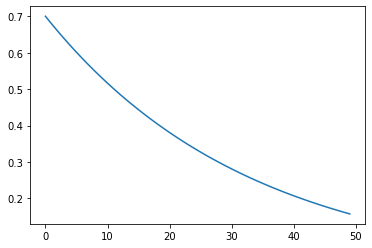

In [12]:
df['exploration_rate'].plot()

<AxesSubplot:>

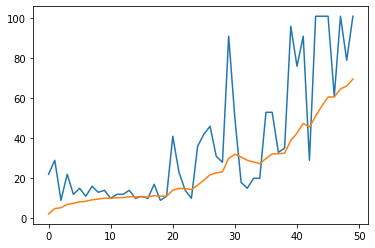

In [13]:
df['accumulated_reward'].plot()
df['sliding_accumulated_reward'].plot()

In [14]:
#
# Test the DQL control
#

In [15]:
env = gym.make('CartPole-v1')

env.reset()

observation_space = env.observation_space.shape[0]
action_space = env.action_space.n

control = DQNControl(observation_space, action_space, name='cartdqn')
control.load()

state = env.reset()
cumulated_reward = 0
restart_count = 0
longest_run = 0
cycle_count = 0

for i in range(100):
    
    if not COLAB:
        env.render(mode='close')

    # get the next action from the controler
    action = control.action( np.reshape(state, [1, observation_space] ) )
    
    # apply action to environment
    observation, reward, done, _ = env.step( action )
    
    # check status
    cumulated_reward += reward
    cycle_count += 1
    state = observation
        
    print( '\r', 'position:{:.2f} pole angle:{:.2f} reward:{} cumulated reward:{} d:{}   a:{}    '.format(observation[2],observation[0],reward,cumulated_reward,done, action), end='' )
    
    if done:
        state = env.reset()
        cumulated_reward = 0
        longest_run = max(longest_run,cycle_count)
        cycle_count = 0
        restart_count += 1

    # some delay important for display to catch up
    time.sleep(0.05)
      
env.close()

print( '\nlongest run {} with {} restarts'.format( longest_run, restart_count) )

building DQN model with observation space 4 and action space 2 layer [24, 24] name cartdqn
loaded model from disk file results/04_dqn_cartdqnmodel.json results/04_dqn_cartdqnmodel.h5
 position:0.09 pole angle:0.07 reward:1.0 cumulated reward:41.0 d:False   a:1     
longest run 59 with 1 restarts


# Lunar lander problem

How we are looking into the lunar lander problem. We reuse the DQN controller from above with different parameters. Play with this problem and get an understanding of the rewards. Configuration is taken from [2]. A general discussion about this approach was published in [1].

- [1] https://www.researchgate.net/publication/333145451_Deep_Q-Learning_on_Lunar_Lander_Game
- [2] https://towardsdatascience.com/ai-learning-to-land-a-rocket-reinforcement-learning-84d61f97d055

In [16]:
#
# Create new environment for lunar lander
#
env = gym.make('LunarLander-v2')

In [17]:
control,history = trainDQN(env=env,episodes=150,layout=[64,32],name='lunar',termination_reward=None,termination_runs=150,termination_runs_reward=-200)

building DQN model with observation space 8 and action space 4 layer [64, 32] name lunar
 episode: 19, exploration: 0.392, score: -107.77132835349899 sliding score -43.347043827655985

KeyboardInterrupt: 

In [ ]:
# Save model for later
control.save()

In [ ]:
df = pd.DataFrame(history)

In [ ]:
df[1].plot()

In [ ]:
df[2].plot()
df[3].plot()

<div class="alert alert-block alert-info">

## Task

Implement an improved controler for the lunar lander (4 points) 

Search the internet for leadboards for lunar lander and try to implement one of the best solutions. Select your solution by simplicity and clarity of code. Comment the code.

</div>

In [ ]:
#
# Result: implementation of improved controler
#
